In [1]:
import networkx as nx
import numpy as np
import qiskit

import arquin

# Modules

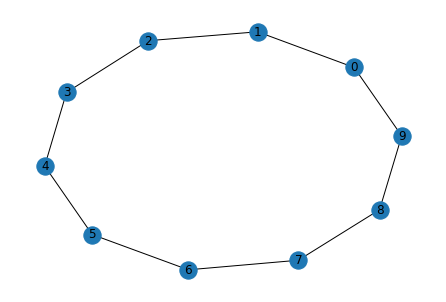

In [2]:
module = arquin.Module(nx.cycle_graph(10), module_index=20)
nx.draw_spring(module.graph, with_labels=True)

# Devices

In [3]:
# Construct a ring device composed of 4 4-qubit ring modules
num_modules = 4
module_size = 4
global_edges = []
for i in range(num_modules):
    global_edges.append([[i, module_size // 2], [(i+1) % num_modules, 0]])
module_graphs = [nx.cycle_graph(4) for _ in range(num_modules)]
device = arquin.Device(global_edges, module_graphs)

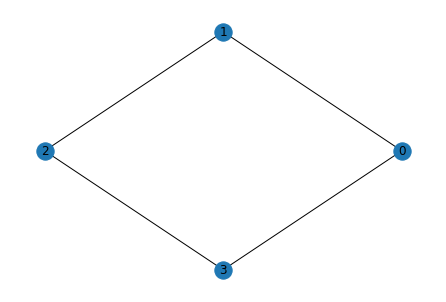

In [4]:
nx.draw_circular(device.graph, with_labels=True)

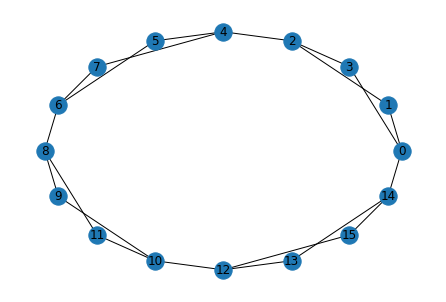

In [5]:
nx.draw_circular(device.physical_qubit_graph, with_labels=True)

In [6]:
for device_qubit in range(device.size):
    mq = device.d2m_p2p_mapping[device_qubit]
    dq = device.m2d_p2p_mapping[mq]
    print(f'd2m({device_qubit}) -> {mq}, m2d({mq}) -> {dq}')

d2m(0) -> (0, 0), m2d((0, 0)) -> 0
d2m(1) -> (0, 1), m2d((0, 1)) -> 1
d2m(2) -> (0, 2), m2d((0, 2)) -> 2
d2m(3) -> (0, 3), m2d((0, 3)) -> 3
d2m(4) -> (1, 0), m2d((1, 0)) -> 4
d2m(5) -> (1, 1), m2d((1, 1)) -> 5
d2m(6) -> (1, 2), m2d((1, 2)) -> 6
d2m(7) -> (1, 3), m2d((1, 3)) -> 7
d2m(8) -> (2, 0), m2d((2, 0)) -> 8
d2m(9) -> (2, 1), m2d((2, 1)) -> 9
d2m(10) -> (2, 2), m2d((2, 2)) -> 10
d2m(11) -> (2, 3), m2d((2, 3)) -> 11
d2m(12) -> (3, 0), m2d((3, 0)) -> 12
d2m(13) -> (3, 1), m2d((3, 1)) -> 13
d2m(14) -> (3, 2), m2d((3, 2)) -> 14
d2m(15) -> (3, 3), m2d((3, 3)) -> 15


# Distributed Compilation

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


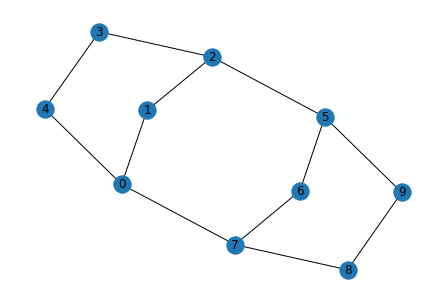

In [15]:
simple_device = arquin.loop.Loop(2, 5, module_offset=1)
print(simple_device.get_qubits())
nx.draw(simple_device.get_qubit_graph(), with_labels=True)

In [19]:
ghz_circuit = qiskit.QuantumCircuit(len(simple_device.get_qubits()))
ghz_circuit.h(0)
for i in range(ghz_circuit.num_qubits - 1):
    ghz_circuit.cx(i, i+1)
ghz_circuit.measure_all()
ghz_circuit.draw()

┌───┐                                              ░ ┌─┐            »
    q_0: ┤ H ├──■───────────────────────────────────────────░─┤M├────────────»
         └───┘┌─┴─┐                                         ░ └╥┘┌─┐         »
    q_1: ─────┤ X ├──■──────────────────────────────────────░──╫─┤M├─────────»
              └───┘┌─┴─┐                                    ░  ║ └╥┘┌─┐      »
    q_2: ──────────┤ X ├──■─────────────────────────────────░──╫──╫─┤M├──────»
                   └───┘┌─┴─┐                               ░  ║  ║ └╥┘┌─┐   »
    q_3: ───────────────┤ X ├──■────────────────────────────░──╫──╫──╫─┤M├───»
                        └───┘┌─┴─┐                          ░  ║  ║  ║ └╥┘┌─┐»
    q_4: ────────────────────┤ X ├──■───────────────────────░──╫──╫──╫──╫─┤M├»
                             └───┘┌─┴─┐                     ░  ║  ║  ║  ║ └╥┘»
    q_5: ─────────────────────────┤ X ├──■──────────────────░──╫──╫──╫──╫──╫─»
                                  └───┘┌─┴─┐                ░  ║  ║  ║  ║  ║ »
    q_6: ──────────────────────────────┤ X ├──■─────────────░──╫──╫──╫──╫──╫─»
                                       └───┘┌─┴─┐           ░  ║  ║  ║  ║  ║ »
    q_7: ───────────────────────────────────┤ X ├──■────────░──╫──╫──╫──╫──╫─»
                                            └───┘┌─┴─┐      ░  ║  ║  ║  ║  ║ »
    q_8: ────────────────────────────────────────┤ X ├──■───░──╫──╫──╫──╫──╫─»
                                                 └───┘┌─┴─┐ ░  ║  ║  ║  ║  ║ »
    q_9: ─────────────────────────────────────────────┤ X ├─░──╫──╫──╫──╫──╫─»
                                                      └───┘ ░  ║  ║  ║  ║  ║ »
meas: 10/══════════════════════════════════════════════════════╩══╩══╩══╩══╩═»
                                                               0  1  2  3  4 »
«                        
«    q_0: ───────────────
«                        
«    q_1: ───────────────
«                        
«    q_2: ───────────────
«                        
«    q_3: ───────────────
«                        
«    q_4: ───────────────
«         ┌─┐            
«    q_5: ┤M├────────────
«         └╥┘┌─┐         
«    q_6: ─╫─┤M├─────────
«          ║ └╥┘┌─┐      
«    q_7: ─╫──╫─┤M├──────
«          ║  ║ └╥┘┌─┐   
«    q_8: ─╫──╫──╫─┤M├───
«          ║  ║  ║ └╥┘┌─┐
«    q_9: ─╫──╫──╫──╫─┤M├
«          ║  ║  ║  ║ └╥┘
«meas: 10/═╩══╩══╩══╩══╩═
«          5  6  7  8  9

In [20]:
modcom = arquin.modular_compiler.ModularCompiler(ghz_circuit, 'GHZ', simple_device, 'LoopDevice')

In [21]:
modcom.run()

AttributeError: 'Loop' object has no attribute 'abstract_inter_edges'